### Import Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.ensemble import RandomForestRegressor

### Import Covid Japan Data

In [54]:
j = pd.read_csv("covid_japan.csv", index_col = "Date", parse_dates = ["Date"])
j.head()

,Country,Province,ISO3,Confirmed,Fatal,Recovered,Hosp_require,Moderate,Severe,Tests,Vaccinations,Vaccinated_once,Vaccinated_full
Date,,,,,,,,,,,,,
2020-02-06,Japan,-,JPN,25,0.0,4.0,0.0,0.0,0.0,698.0,0.0,0.0,0.0
2020-02-07,Japan,-,JPN,25,0.0,4.0,0.0,0.0,0.0,717.0,0.0,0.0,0.0
2020-02-10,Japan,-,JPN,26,0.0,9.0,0.0,0.0,0.0,938.0,0.0,0.0,0.0
2020-02-12,Japan,-,JPN,28,0.0,10.0,0.0,0.0,0.0,954.0,0.0,0.0,0.0
2020-02-13,Japan,-,JPN,29,0.0,11.0,0.0,0.0,0.0,964.0,0.0,0.0,0.0


### Plot Japan Confirmed Cases Time Series

In [55]:
japan_confirmed = j.groupby("Date")["Confirmed"].agg(["sum"])
japan_confirmed.to_csv("japan_confirmed.csv")

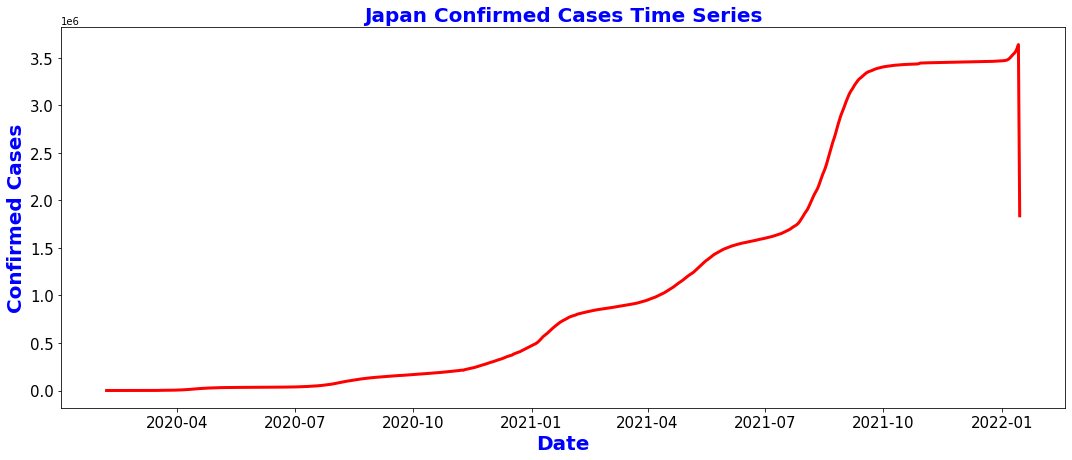

In [56]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = japan_confirmed.index, y = "sum", data = japan_confirmed, color = "red", linewidth = 3)
plt.title("Japan Confirmed Cases Time Series", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Confirmed Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("Japan_Confirmed_Cases.png")
plt.show()

### Random Forest (Confirmed Cases)

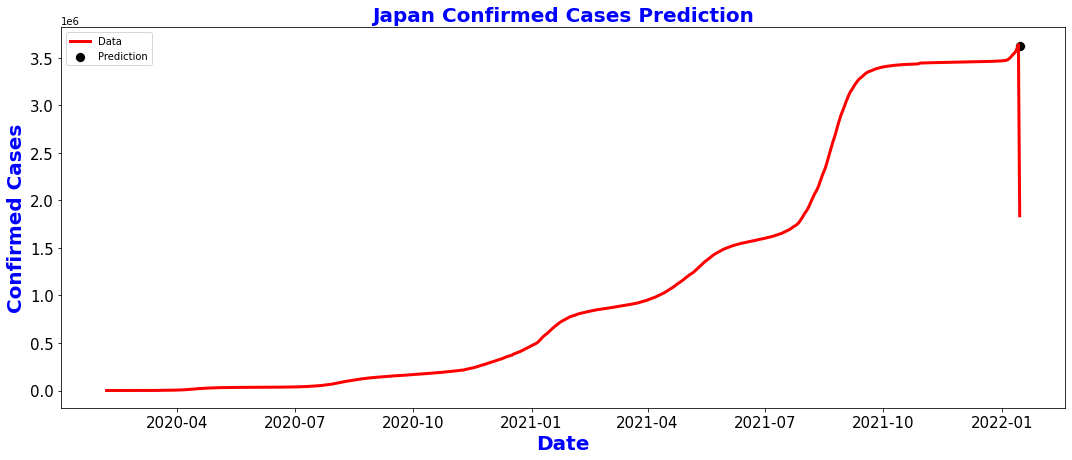

In [57]:
dp = DeterministicProcess(japan_confirmed.index, order=3)
features = dp.in_sample()

past_data = features.loc[:"2022-01-14"]
target_data = japan_confirmed.loc[:"2022-01-14"]

forecast = features.loc[["2022-01-15"]]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = japan_confirmed.index, y = "sum", data = japan_confirmed, color = "red", label = "Data", linewidth = 3)
sns.scatterplot(x = forecast.index, y = pred_rf, color = "black", s = 100, label = "Prediction")
plt.title("Japan Confirmed Cases Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Confirmed Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("RandomForest_Japan_Confirmed.png")
plt.show()

### Plot Japan Fatal Cases Time Series

In [58]:
japan_fatal = j.groupby("Date")["Fatal"].agg(["sum"])
japan_fatal.to_csv("japan_fatal.csv")

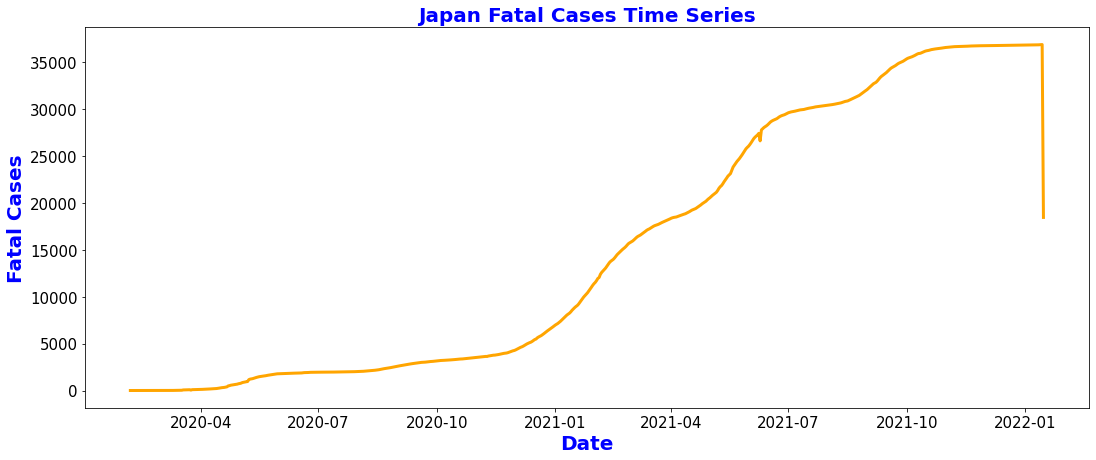

In [59]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = japan_fatal.index, y = "sum", data = japan_fatal, color = "orange", linewidth = 3)
plt.title("Japan Fatal Cases Time Series", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Fatal Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("Japan_Fatal.png")
plt.show()

### Random Forest Fatal Cases

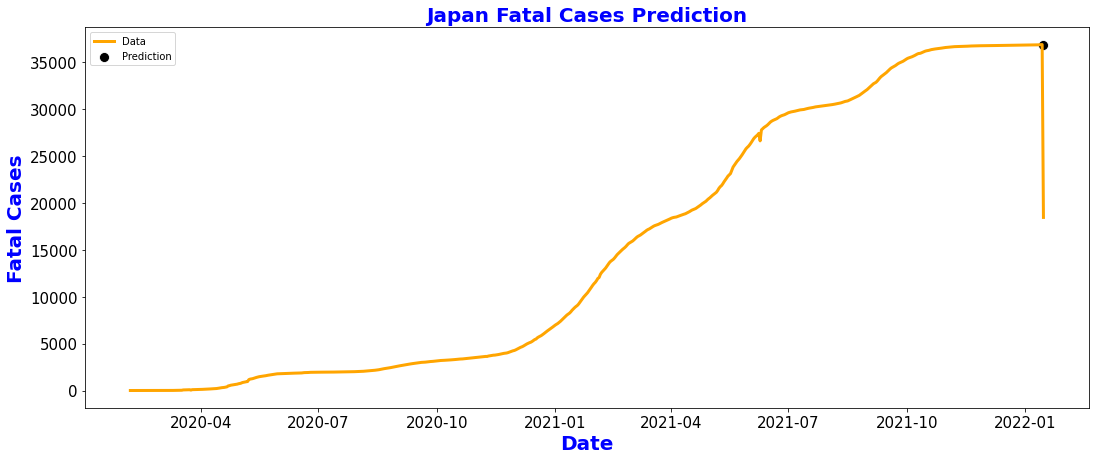

In [60]:
dp = DeterministicProcess(japan_fatal.index, order=3)
features = dp.in_sample()

past_data = features.loc[:"2022-01-14"]
target_data = japan_fatal.loc[:"2022-01-14"]

forecast = features.loc[["2022-01-15"]]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = japan_fatal.index, y = "sum", data = japan_fatal, color = "orange", label = "Data", linewidth = 3)
sns.scatterplot(x = forecast.index, y = pred_rf, color = "black", s = 100, label = "Prediction")
plt.title("Japan Fatal Cases Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Fatal Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("RandomForest_Fatal_Japan.png")
plt.show()

### Plot Japan Recovered Cases Time Series

In [61]:
japan_recovered = j.groupby("Date")["Recovered"].agg(["sum"])
japan_recovered.to_csv("japan_recovered.csv")

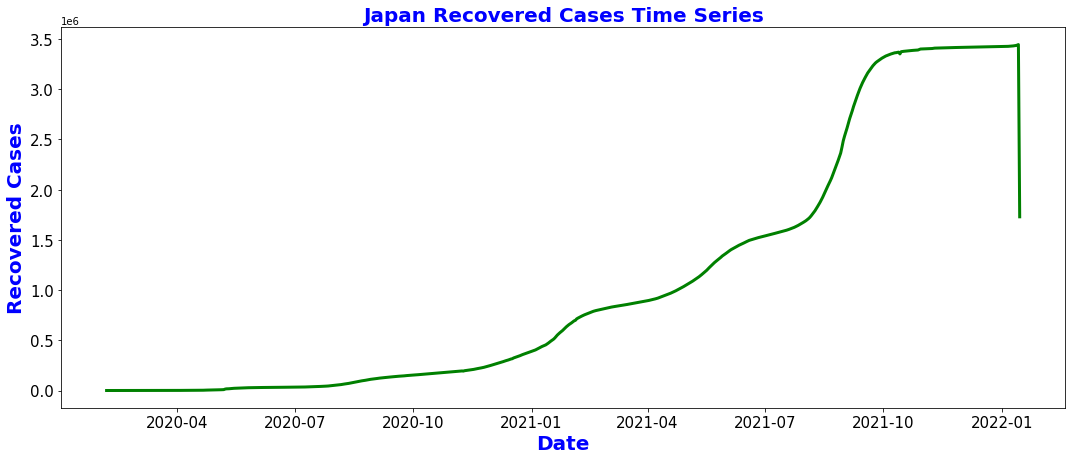

In [62]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = japan_recovered.index, y = "sum", data = japan_recovered, color = "green", linewidth = 3)
plt.title("Japan Recovered Cases Time Series", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Recovered Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("Japan_Recovered.png")
plt.show()

### Random Forest (Recovered Cases)

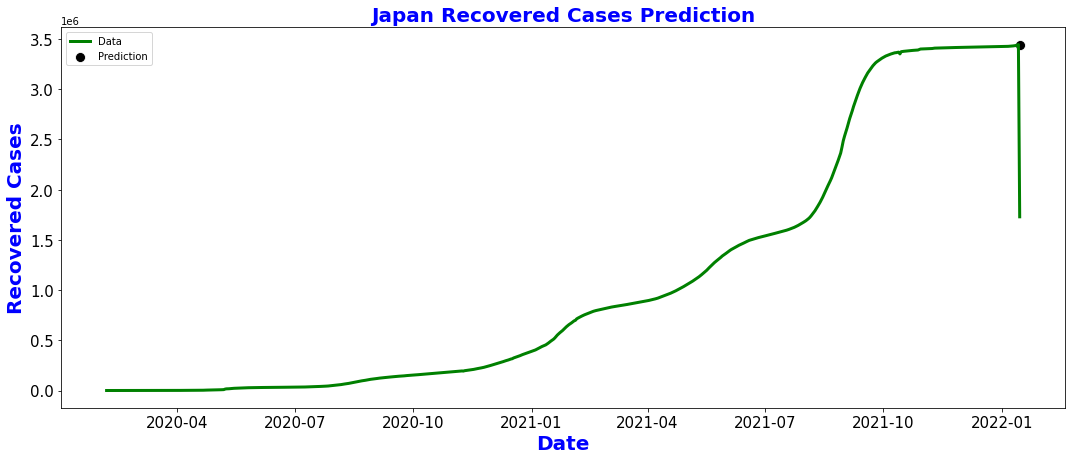

In [63]:
dp = DeterministicProcess(japan_recovered.index, order=3)
features = dp.in_sample()

past_data = features.loc[:"2022-01-14"]
target_data = japan_recovered.loc[:"2022-01-14"]

forecast = features.loc[["2022-01-15"]]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = japan_recovered.index, y = "sum", data = japan_recovered, color = "green", label = "Data", linewidth = 3)
sns.scatterplot(x = forecast.index, y = pred_rf, color = "black", s = 100, label = "Prediction")
plt.title("Japan Recovered Cases Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Recovered Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("RandomForest_Recovered_Japan.png")
plt.show()

### Import Covid Data

In [64]:
c = pd.read_csv("covid19dh.csv", index_col = "Date", parse_dates = ["Date"])
c.head()

,Country,Province,Tests,Confirmed,Fatal,Recovered,Population,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Date,,,,,,,,,,,,,,,,,,,,
2020-01-22,Saint Lucia,NaN,NaN,NaN,NaN,NaN,181889.0,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,Saint Lucia,NaN,NaN,NaN,NaN,NaN,181889.0,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,Saint Lucia,NaN,NaN,NaN,NaN,NaN,181889.0,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,Saint Lucia,NaN,NaN,NaN,NaN,NaN,181889.0,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,Saint Lucia,NaN,NaN,NaN,NaN,NaN,181889.0,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot Covid Tests Time Series

In [65]:
c = c.fillna(0)

In [66]:
c["Tests"] = c["Tests"].astype("int")

In [67]:
covid_tests = c.groupby("Date")["Tests"].agg(["sum"])
covid_tests.to_csv("covid_tests.csv")

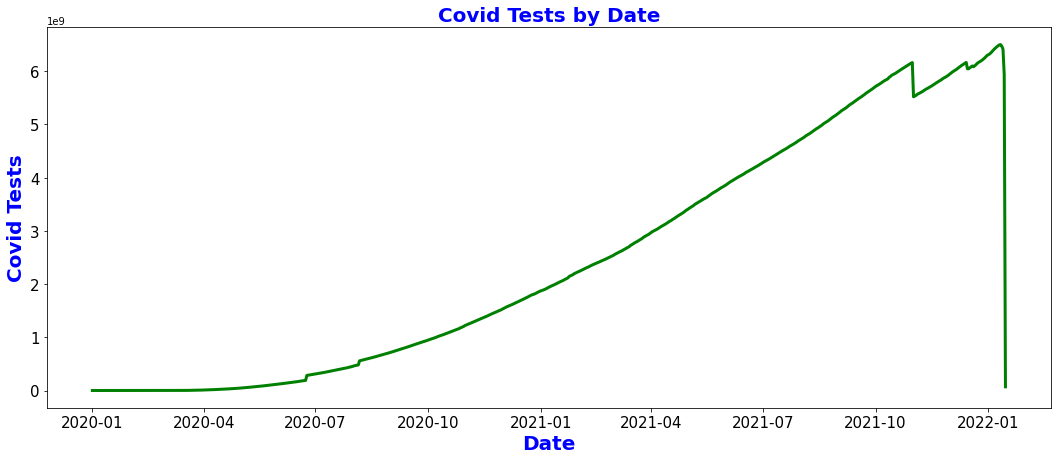

In [68]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_tests.index, y = "sum", data = covid_tests, linewidth = 3, color = "green")
plt.title("Covid Tests by Date", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Tests", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("world_covid_tests.png")
plt.show()

### Random Forest Covid Tests

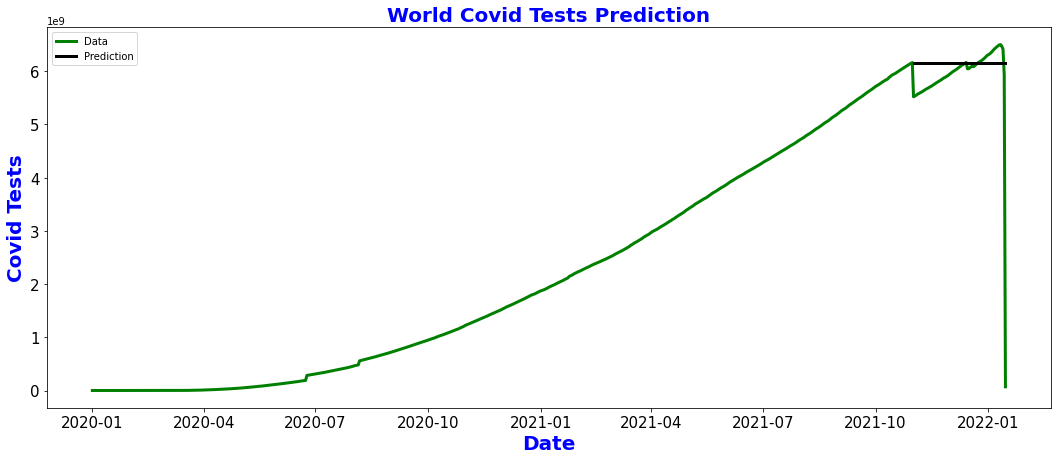

In [69]:
dp = DeterministicProcess(covid_tests.index, order=3)
features = dp.in_sample()

past_data = features.loc[:"2021-10-31"]
target_data = covid_tests.loc[:"2021-10-31"]

forecast = features.loc["2021-11-01":]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_tests.index, y = "sum", data = covid_tests, color = "green", label = "Data", linewidth = 3)
sns.lineplot(x = forecast.index, y = pred_rf, color = "black", linewidth = 3, label = "Prediction")
plt.title("World Covid Tests Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Tests", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("World_Covid_Tests_Prediction.png")
plt.show()

### Plot Covid Confirmed Time Series

In [70]:
covid_confirmed = c.groupby("Date")["Confirmed"].agg(["sum"])

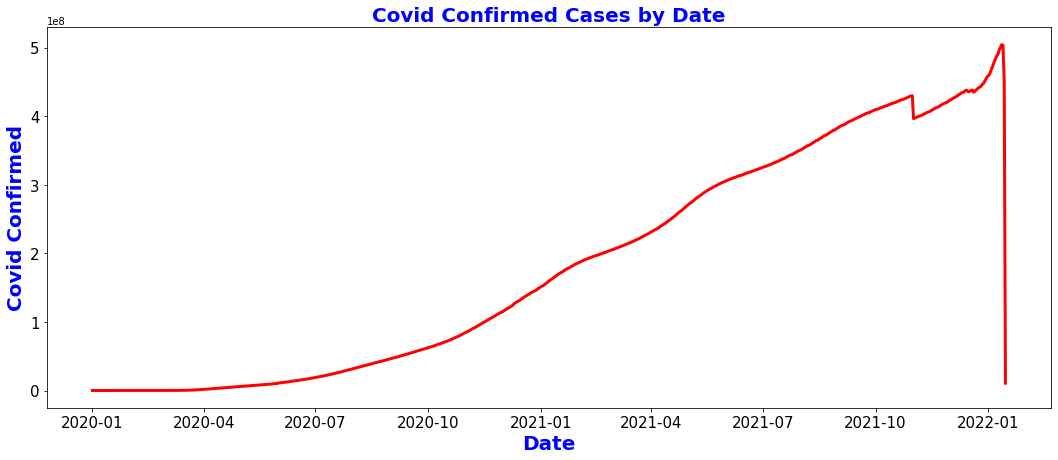

In [71]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_confirmed.index, y = "sum", data = covid_confirmed, linewidth = 3, color = "red")
plt.title("Covid Confirmed Cases by Date", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Confirmed", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("world_covid_confirmed.png")
plt.show()

### Random Forest Covid Confirmed

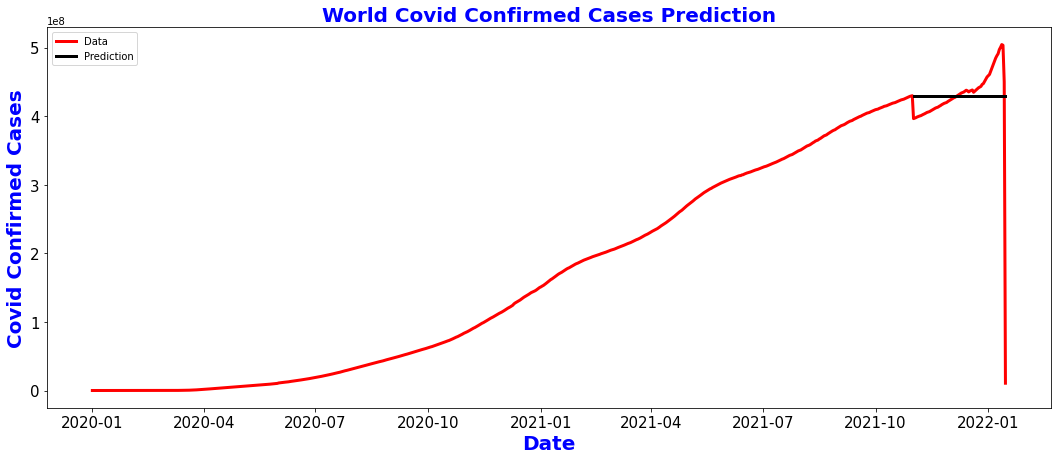

In [72]:
dp = DeterministicProcess(covid_confirmed.index, order=3)
features = dp.in_sample()

past_data = features.loc[:"2021-10-31"]
target_data = covid_confirmed.loc[:"2021-10-31"]

forecast = features.loc["2021-11-01":]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_confirmed.index, y = "sum", data = covid_confirmed, color = "red", label = "Data", linewidth = 3)
sns.lineplot(x = forecast.index, y = pred_rf, color = "black", linewidth = 3, label = "Prediction")
plt.title("World Covid Confirmed Cases Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Confirmed Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("World_Covid_Confirmed_Prediction.png")
plt.show()

### Plot Covid Fatal Cases Time Series

In [73]:
covid_fatal = c.groupby("Date")["Fatal"].agg(["sum"])
covid_fatal.to_csv("covid_fatal.csv")

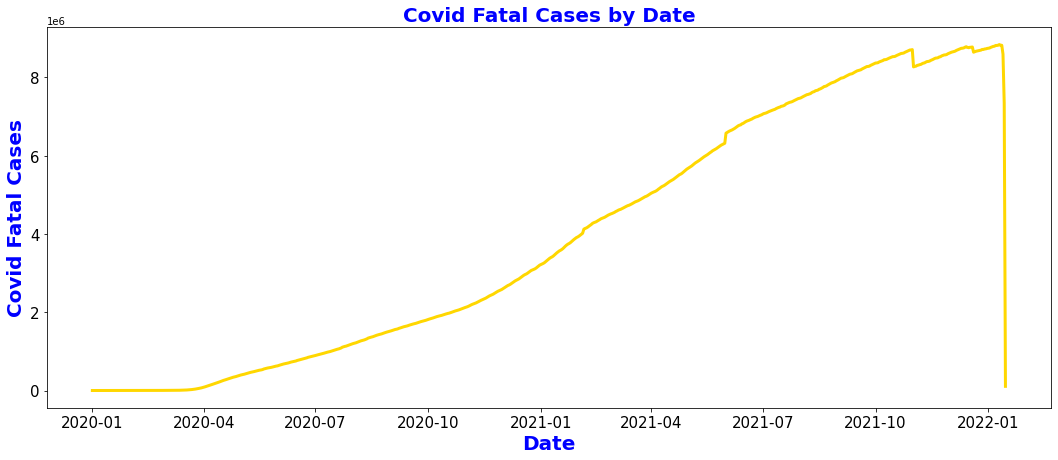

In [74]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_fatal.index, y = "sum", data = covid_fatal, linewidth = 3, color = "gold")
plt.title("Covid Fatal Cases by Date", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Fatal Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("world_covid_fatal.png")
plt.show()

### Random Forest Covid Fatal Cases 

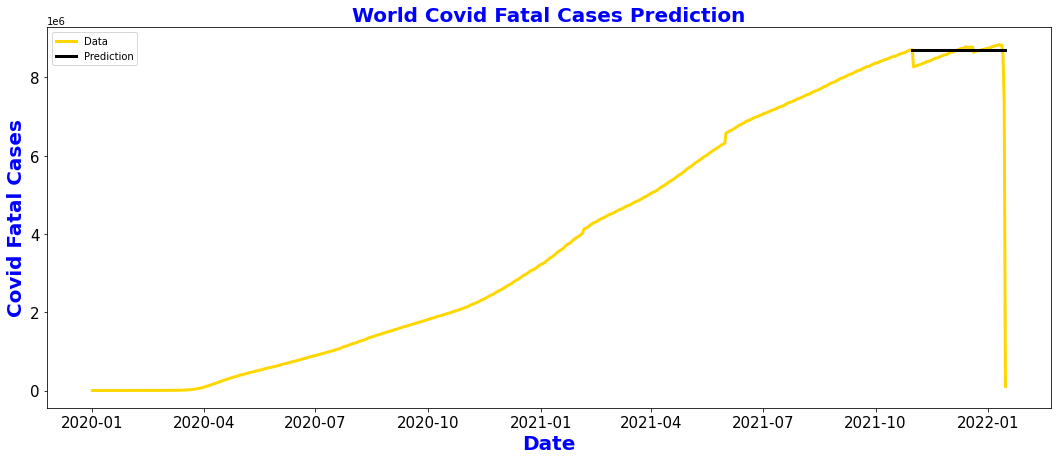

In [75]:
dp = DeterministicProcess(covid_confirmed.index, order=3)
features = dp.in_sample()
past_data = features.loc[:"2021-10-30"]
target_data = covid_fatal.loc[:"2021-10-30"]

forecast = features.loc["2021-10-31":]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_fatal.index, y = "sum", data = covid_fatal, color = "gold", label = "Data", linewidth = 3)
sns.lineplot(x = forecast.index, y = pred_rf, color = "black", linewidth = 3, label = "Prediction")
plt.title("World Covid Fatal Cases Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Fatal Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("World_Covid_Fatal_Prediction.png")
plt.show()

### Plot Covid Recovered Cases Time Series

In [76]:
covid_recovered = c.groupby("Date")["Recovered"].agg(["sum"])
covid_recovered.to_csv("covid_recovered.csv")

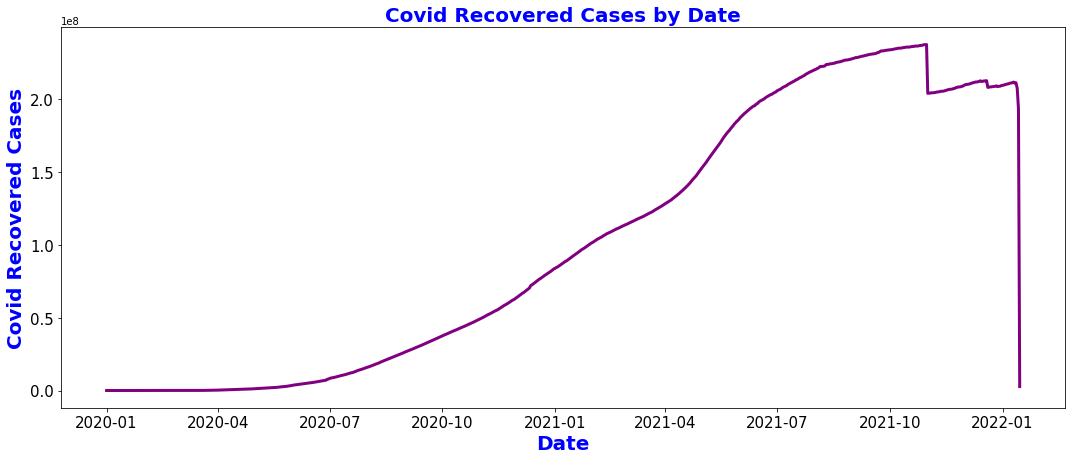

In [77]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_recovered.index, y = "sum", data = covid_recovered, linewidth = 3, color = "purple")
plt.title("Covid Recovered Cases by Date", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Recovered Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("world_covid_recovered.png")
plt.show()

### Random Forest Covid Recovered Cases

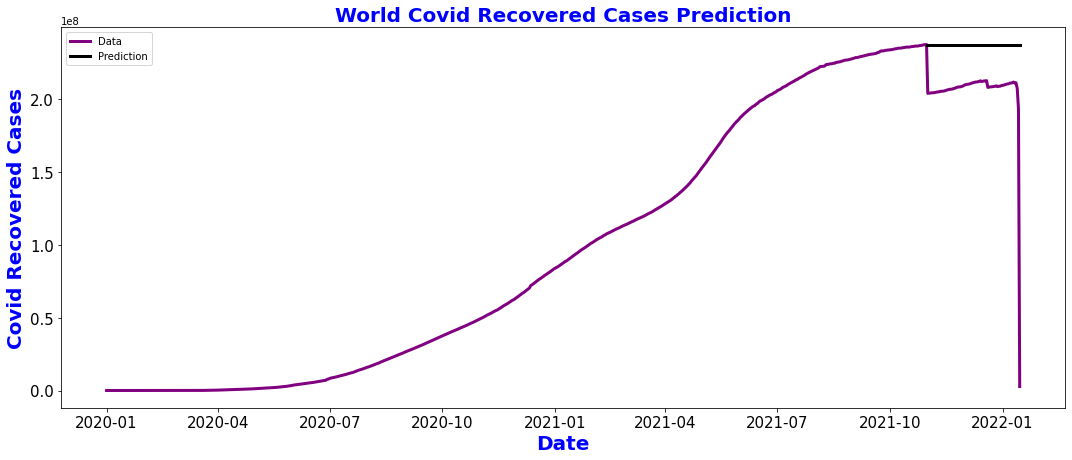

In [78]:
dp = DeterministicProcess(covid_confirmed.index, order=3)
features = dp.in_sample()
past_data = features.loc[:"2021-10-30"]
target_data = covid_recovered.loc[:"2021-10-30"]

forecast = features.loc["2021-10-31":]

rf = RandomForestRegressor()

rf.fit(past_data, target_data["sum"])

pred_rf = rf.predict(forecast)

plt.figure(figsize = (18, 7))
sns.lineplot(x = covid_recovered.index, y = "sum", data = covid_recovered, color = "purple", label = "Data", linewidth = 3)
sns.lineplot(x = forecast.index, y = pred_rf, color = "black", linewidth = 3, label = "Prediction")
plt.title("World Covid Recovered Cases Prediction", color = "blue", size = 20, weight = "bold")
plt.xlabel("Date", color = "blue", size = 20, weight = "bold")
plt.ylabel("Covid Recovered Cases", color = "blue", size = 20, weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.savefig("World_Covid_Recovered_Prediction.png")
plt.show()